In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/train.csv')

In [3]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
data.columns = [
    'Product_ID', 'Product_Weight', 'Product_Fat_Content', 'Product_Visibility_Percentage',
'Product_Category', 'Product_MRP', 'Store_ID', 'Store_Established_Year',
'Store_Size', 'Store_Location_Type', 'Store_Type', 'Product_Sales'

]

In [5]:
data.head(5)

Product_ID  Product_Weight Product_Fat_Content  \
0      FDA15            9.30             Low Fat   
1      DRC01            5.92             Regular   
2      FDN15           17.50             Low Fat   
3      FDX07           19.20             Regular   
4      NCD19            8.93             Low Fat   

   Product_Visibility_Percentage       Product_Category  Product_MRP Store_ID  \
0                       0.016047                  Dairy     249.8092   OUT049   
1                       0.019278            Soft Drinks      48.2692   OUT018   
2                       0.016760                   Meat     141.6180   OUT049   
3                       0.000000  Fruits and Vegetables     182.0950   OUT010   
4                       0.000000              Household      53.8614   OUT013   

   Store_Established_Year Store_Size Store_Location_Type         Store_Type  \
0                    1999     Medium              Tier 1  Supermarket Type1   
1                    2009     Medium              Tier 3  Supermarket Type2   
2                    1999     Medium              Tier 1  Supermarket Type1   
3                    1998        NaN              Tier 3      Grocery Store   
4                    1987       High              Tier 3  Supermarket Type1   

   Product_Sales  
0      3735.1380  
1       443.4228  
2      2097.2700  
3       732.3800  
4       994.7052

In [6]:
data.sample(5)

Product_ID  Product_Weight Product_Fat_Content  \
7598      FDI20             NaN             Low Fat   
455       NCE43           12.50                  LF   
2490      FDP31           21.10             Regular   
6649      DRO35           13.85             Low Fat   
4323      DRD37            9.80             Low Fat   

      Product_Visibility_Percentage       Product_Category  Product_MRP  \
7598                       0.067520  Fruits and Vegetables     211.3586   
455                        0.103423              Household     169.9448   
2490                       0.162418  Fruits and Vegetables      64.9168   
6649                       0.034570            Hard Drinks     117.4492   
4323                       0.013870            Soft Drinks      47.4060   

     Store_ID  Store_Established_Year Store_Size Store_Location_Type  \
7598   OUT019                    1985      Small              Tier 1   
455    OUT035                    2004      Small              Tier 2   
2490   OUT017                    2007        NaN              Tier 2   
6649   OUT046                    1997      Small              Tier 1   
4323   OUT045                    2002        NaN              Tier 2   

             Store_Type  Product_Sales  
7598      Grocery Store       422.1172  
455   Supermarket Type1      2897.5616  
2490  Supermarket Type1       639.1680  
6649  Supermarket Type1      3243.7776  
4323  Supermarket Type1       978.7260

In [7]:
data.shape

(8523, 12)

In [8]:
data.describe(include='all')

Product_ID  Product_Weight Product_Fat_Content  \
count        8523     7060.000000                8523   
unique       1559             NaN                   5   
top         FDW13             NaN             Low Fat   
freq           10             NaN                5089   
mean          NaN       12.857645                 NaN   
std           NaN        4.643456                 NaN   
min           NaN        4.555000                 NaN   
25%           NaN        8.773750                 NaN   
50%           NaN       12.600000                 NaN   
75%           NaN       16.850000                 NaN   
max           NaN       21.350000                 NaN   

        Product_Visibility_Percentage       Product_Category  Product_MRP  \
count                     8523.000000                   8523  8523.000000   
unique                            NaN                     16          NaN   
top                               NaN  Fruits and Vegetables          NaN   
freq                              NaN                   1232          NaN   
mean                         0.066132                    NaN   140.992782   
std                          0.051598                    NaN    62.275067   
min                          0.000000                    NaN    31.290000   
25%                          0.026989                    NaN    93.826500   
50%                          0.053931                    NaN   143.012800   
75%                          0.094585                    NaN   185.643700   
max                          0.328391                    NaN   266.888400   

       Store_ID  Store_Established_Year Store_Size Store_Location_Type  \
count      8523             8523.000000       6113                8523   
unique       10                     NaN          3                   3   
top      OUT027                     NaN     Medium              Tier 3   
freq        935                     NaN       2793                3350   
mean        NaN             1997.831867        NaN                 NaN   
std         NaN                8.371760        NaN                 NaN   
min         NaN             1985.000000        NaN                 NaN   
25%         NaN             1987.000000        NaN                 NaN   
50%         NaN             1999.000000        NaN                 NaN   
75%         NaN             2004.000000        NaN                 NaN   
max         NaN             2009.000000        NaN                 NaN   

               Store_Type  Product_Sales  
count                8523    8523.000000  
unique                  4            NaN  
top     Supermarket Type1            NaN  
freq                 5577            NaN  
mean                  NaN    2181.288914  
std                   NaN    1706.499616  
min                   NaN      33.290000  
25%                   NaN     834.247400  
50%                   NaN    1794.331000  
75%                   NaN    3101.296400  
max                   NaN   13086.964800

In [9]:
data.isnull().sum().sort_values(ascending=False)

Store_Size                       2410
Product_Weight                   1463
Product_Fat_Content                 0
Product_ID                          0
Product_Visibility_Percentage       0
Product_Category                    0
Store_ID                            0
Product_MRP                         0
Store_Established_Year              0
Store_Location_Type                 0
Store_Type                          0
Product_Sales                       0
dtype: int64

In [10]:
per = (data.isnull().sum() * 100 / len(data)).sort_values(ascending=False)
print(per)

Store_Size                       28.276428
Product_Weight                   17.165317
Product_Fat_Content               0.000000
Product_ID                        0.000000
Product_Visibility_Percentage     0.000000
Product_Category                  0.000000
Store_ID                          0.000000
Product_MRP                       0.000000
Store_Established_Year            0.000000
Store_Location_Type               0.000000
Store_Type                        0.000000
Product_Sales                     0.000000
dtype: float64


In [11]:
data.duplicated().any()

np.False_

In [12]:
data['Product_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Product_Weight, Length: 8523, dtype: float64

In [13]:
data['Store_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Store_Size, Length: 8523, dtype: object

In [14]:
data.columns

Index(['Product_ID', 'Product_Weight', 'Product_Fat_Content',
       'Product_Visibility_Percentage', 'Product_Category', 'Product_MRP',
       'Store_ID', 'Store_Established_Year', 'Store_Size',
       'Store_Location_Type', 'Store_Type', 'Product_Sales'],
      dtype='object')

In [15]:
mean_weight = data['Product_Weight'].mean()
median_weight = data['Product_Weight'].median()

In [16]:
print(mean_weight, median_weight)

12.857645184135976 12.6


In [17]:
data['Product_Weight_mean'] = data['Product_Weight'].fillna(mean_weight)
data['Product_Weight_median'] = data['Product_Weight'].fillna(median_weight)

In [18]:
data.head(50)

Product_ID  Product_Weight Product_Fat_Content  \
0       FDA15           9.300             Low Fat   
1       DRC01           5.920             Regular   
2       FDN15          17.500             Low Fat   
3       FDX07          19.200             Regular   
4       NCD19           8.930             Low Fat   
5       FDP36          10.395             Regular   
6       FDO10          13.650             Regular   
7       FDP10             NaN             Low Fat   
8       FDH17          16.200             Regular   
9       FDU28          19.200             Regular   
10      FDY07          11.800             Low Fat   
11      FDA03          18.500             Regular   
12      FDX32          15.100             Regular   
13      FDS46          17.600             Regular   
14      FDF32          16.350             Low Fat   
15      FDP49           9.000             Regular   
16      NCB42          11.800             Low Fat   
17      FDP49           9.000             Regular   
18      DRI11             NaN             Low Fat   
19      FDU02          13.350             Low Fat   
20      FDN22          18.850             Regular   
21      FDW12             NaN             Regular   
22      NCB30          14.600             Low Fat   
23      FDC37             NaN             Low Fat   
24      FDR28          13.850             Regular   
25      NCD06          13.000             Low Fat   
26      FDV10           7.645             Regular   
27      DRJ59          11.650             low fat   
28      FDE51           5.925             Regular   
29      FDC14             NaN             Regular   
30      FDV38          19.250             Low Fat   
31      NCS17          18.600             Low Fat   
32      FDP33          18.700             Low Fat   
33      FDO23          17.850             Low Fat   
34      DRH01          17.500             Low Fat   
35      NCX29          10.000             Low Fat   
36      FDV20             NaN             Regular   
37      DRZ11           8.850             Regular   
38      FDX10             NaN             Regular   
39      FDB34             NaN             Low Fat   
40      FDU02          13.350             Low Fat   
41      FDK43           9.800             Low Fat   
42      FDA46          13.600             Low Fat   
43      FDC02          21.350             Low Fat   
44      FDL50          12.150             Regular   
45      FDM39           6.420                  LF   
46      NCP05          19.600             Low Fat   
47      FDV49          10.000             Low Fat   
48      FDL12          15.850             Regular   
49      FDS02             NaN             Regular   

    Product_Visibility_Percentage       Product_Category  Product_MRP  \
0                        0.016047                  Dairy     249.8092   
1                        0.019278            Soft Drinks      48.2692   
2                        0.016760                   Meat     141.6180   
3                        0.000000  Fruits and Vegetables     182.0950   
4                        0.000000              Household      53.8614   
5                        0.000000           Baking Goods      51.4008   
6                        0.012741            Snack Foods      57.6588   
7                        0.127470            Snack Foods     107.7622   
8                        0.016687           Frozen Foods      96.9726   
9                        0.094450           Frozen Foods     187.8214   
10                       0.000000  Fruits and Vegetables      45.5402   
11                       0.045464                  Dairy     144.1102   
12                       0.100014  Fruits and Vegetables     145.4786   
13                       0.047257            Snack Foods     119.6782   
14                       0.068024  Fruits and Vegetables     196.4426   
15                       0.069089              Breakfast      56.3614   
16                       0.008596     Health and Hygiene  

In [19]:

print("Original Weight variable variance", data['Product_Weight'].var())
print("Product Weight variance after mean imputation", data['Product_Weight_mean'].var())
print("Product Weight variance after median imputation", data['Product_Weight_median'].var())

Original Weight variable variance 21.56168825983637
Product Weight variance after mean imputation 17.860121735060453
Product Weight variance after median imputation 17.869561454073366


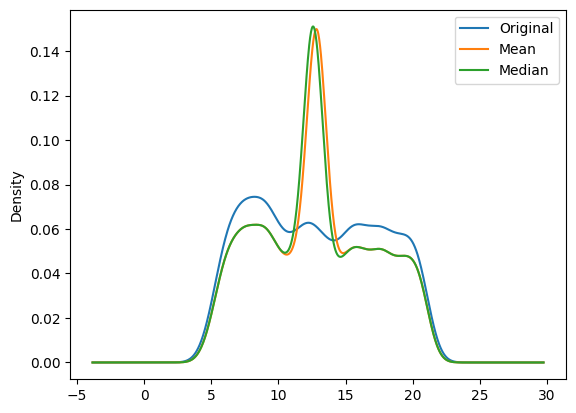

In [20]:
data['Product_Weight'].plot(kind= "kde", label="Original")
data['Product_Weight_mean'].plot(kind= "kde", label= "Mean")
data['Product_Weight_median'].plot(kind= "kde", label= "Median")

plt.legend()
plt.show()

<Axes: >

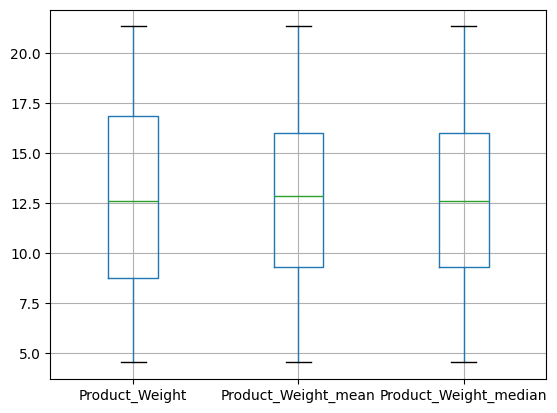

In [21]:
data[['Product_Weight', 'Product_Weight_mean', 'Product_Weight_median']].boxplot()

In [22]:
data['Product_Weight_interploate'] = data['Product_Weight'].interpolate(method="linear")

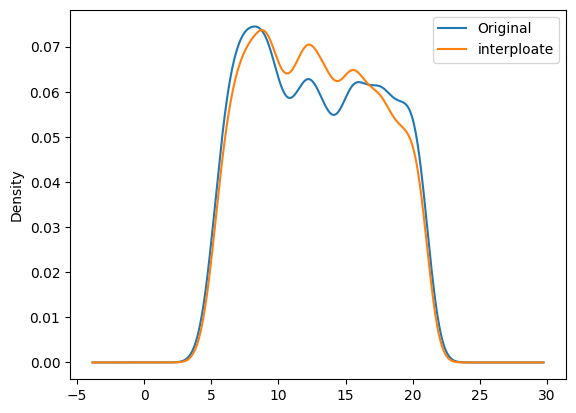

In [23]:
data['Product_Weight'].plot(kind= "kde", label ="Original")
data['Product_Weight_interploate'].plot(kind = "kde", label = "interploate")

plt.legend()
plt.show()

In [24]:
from sklearn.impute import KNNImputer

In [25]:
knn = KNNImputer(n_neighbors=10, weights="distance")

In [26]:
data['knn_imputer'] = knn.fit_transform(data[['Product_Weight']]).ravel()

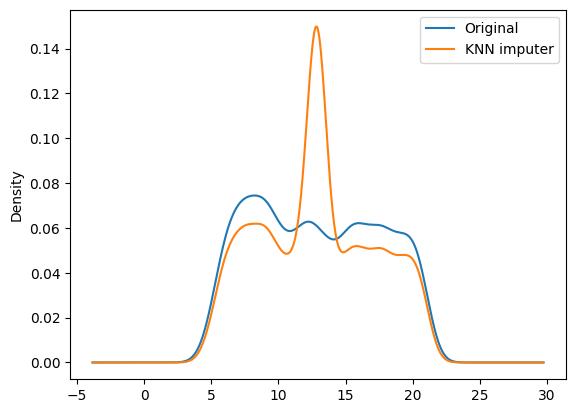

In [27]:
data['Product_Weight'].plot(kind="kde", label="Original")
data['knn_imputer'].plot(kind="kde", label="KNN imputer")

plt.legend()
plt.show()

In [28]:
data = data.drop(['Product_Weight','Product_Weight_mean','Product_Weight_median','knn_imputer'],axis=1)


In [29]:
data.head(1)

Product_ID Product_Fat_Content  Product_Visibility_Percentage  \
0      FDA15             Low Fat                       0.016047   

  Product_Category  Product_MRP Store_ID  Store_Established_Year Store_Size  \
0            Dairy     249.8092   OUT049                    1999     Medium   

  Store_Location_Type         Store_Type  Product_Sales  \
0              Tier 1  Supermarket Type1       3735.138   

   Product_Weight_interploate  
0                         9.3

In [30]:
data.isnull().sum().sort_values(ascending=False)

Store_Size                       2410
Product_ID                          0
Product_Visibility_Percentage       0
Product_Fat_Content                 0
Product_Category                    0
Product_MRP                         0
Store_ID                            0
Store_Established_Year              0
Store_Location_Type                 0
Store_Type                          0
Product_Sales                       0
Product_Weight_interploate          0
dtype: int64

In [31]:
data['Store_Size'].value_counts()

Store_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [32]:
data['Store_Type'].value_counts()

Store_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [33]:
mode_store = data.pivot_table(values='Store_Size',columns='Store_Type',aggfunc=(lambda x:x.mode()[0]))

In [34]:
mode_store

Store_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Store_Size         Small             Small            Medium            Medium

In [35]:
missing_values = data['Store_Size'].isnull()

In [36]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Store_Size, Length: 8523, dtype: bool

In [37]:
data.loc[missing_values,'Store_Size'] = data.loc[missing_values,'Store_Type'].apply(lambda x :mode_store[x])


In [38]:
data.isnull().sum()

Product_ID                       0
Product_Fat_Content              0
Product_Visibility_Percentage    0
Product_Category                 0
Product_MRP                      0
Store_ID                         0
Store_Established_Year           0
Store_Size                       0
Store_Location_Type              0
Store_Type                       0
Product_Sales                    0
Product_Weight_interploate       0
dtype: int64

#Product_Fat_Content

In [39]:
data.columns

Index(['Product_ID', 'Product_Fat_Content', 'Product_Visibility_Percentage',
       'Product_Category', 'Product_MRP', 'Store_ID', 'Store_Established_Year',
       'Store_Size', 'Store_Location_Type', 'Store_Type', 'Product_Sales',
       'Product_Weight_interploate'],
      dtype='object')

In [40]:
data['Product_Fat_Content'].value_counts()

Product_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [41]:
data.replace({'Product_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}}, inplace= True)

In [42]:
data['Product_Fat_Content'].value_counts()

Product_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#Product_Visibility_Percentage

In [43]:
data['Product_Visibility_Percentage'].value_counts()

Product_Visibility_Percentage
0.000000    526
0.076975      3
0.061271      2
0.046825      2
0.112399      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.083060      1
Name: count, Length: 7880, dtype: int64

In [44]:
data['Product_Visibility_Percentage_interpolate'] = data['Product_Visibility_Percentage'].replace(0,np.nan).interpolate(method='linear')

In [45]:
data.head(1)

Product_ID Product_Fat_Content  Product_Visibility_Percentage  \
0      FDA15             Low Fat                       0.016047   

  Product_Category  Product_MRP Store_ID  Store_Established_Year Store_Size  \
0            Dairy     249.8092   OUT049                    1999     Medium   

  Store_Location_Type         Store_Type  Product_Sales  \
0              Tier 1  Supermarket Type1       3735.138   

   Product_Weight_interploate  Product_Visibility_Percentage_interpolate  
0                         9.3                                   0.016047

In [46]:
data['Product_Visibility_Percentage_interpolate'].value_counts()

Product_Visibility_Percentage_interpolate
0.076975    3
0.128296    2
0.014041    2
0.052150    2
0.040912    2
           ..
0.046559    1
0.309390    1
0.039248    1
0.040946    1
0.057144    1
Name: count, Length: 8405, dtype: int64

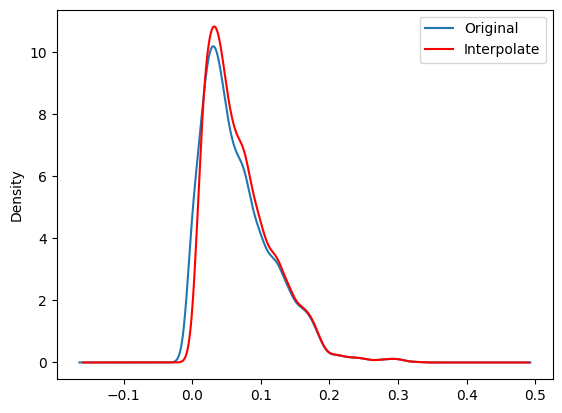

In [47]:
data['Product_Visibility_Percentage'].plot(kind="kde", label="Original")
data['Product_Visibility_Percentage_interpolate'].plot(kind="kde", color='red', label="Interpolate")

plt.legend()
plt.show()

In [48]:
data = data.drop('Product_Visibility_Percentage', axis=1)

In [49]:
data.head(1)

Product_ID Product_Fat_Content Product_Category  Product_MRP Store_ID  \
0      FDA15             Low Fat            Dairy     249.8092   OUT049   

   Store_Established_Year Store_Size Store_Location_Type         Store_Type  \
0                    1999     Medium              Tier 1  Supermarket Type1   

   Product_Sales  Product_Weight_interploate  \
0       3735.138                         9.3   

   Product_Visibility_Percentage_interpolate  
0                                   0.016047

# Product_Category

In [50]:
data['Product_Category'].value_counts()

Product_Category
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


# Product_ID

In [51]:
data['Product_ID'].value_counts().sample(5)

Product_ID
FDJ03    4
FDA58    3
FDP40    5
FDR49    5
FDB02    5
Name: count, dtype: int64

In [52]:
data['Product_ID'] = data['Product_ID'].apply(lambda x: x[:2])

In [53]:
data['Product_ID'].value_counts()

Product_ID
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

# Store_Established_Year

In [54]:
data['Store_Established_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Store_Established_Year, Length: 8523, dtype: int64

In [55]:
import datetime as dt

In [56]:
current_year = dt.datetime.today().year

In [57]:
current_year

2025

In [58]:
data['Store_age'] = current_year - data['Store_Established_Year']

In [59]:
data.head(1)

Product_ID Product_Fat_Content Product_Category  Product_MRP Store_ID  \
0         FD             Low Fat            Dairy     249.8092   OUT049   

   Store_Established_Year Store_Size Store_Location_Type         Store_Type  \
0                    1999     Medium              Tier 1  Supermarket Type1   

   Product_Sales  Product_Weight_interploate  \
0       3735.138                         9.3   

   Product_Visibility_Percentage_interpolate  Store_age  
0                                   0.016047         26

In [60]:
data.drop('Store_Established_Year',axis=1, inplace=True)

In [61]:
data

Product_ID Product_Fat_Content       Product_Category  Product_MRP  \
0            FD             Low Fat                  Dairy     249.8092   
1            DR             Regular            Soft Drinks      48.2692   
2            FD             Low Fat                   Meat     141.6180   
3            FD             Regular  Fruits and Vegetables     182.0950   
4            NC             Low Fat              Household      53.8614   
...         ...                 ...                    ...          ...   
8518         FD             Low Fat            Snack Foods     214.5218   
8519         FD             Regular           Baking Goods     108.1570   
8520         NC             Low Fat     Health and Hygiene      85.1224   
8521         FD             Regular            Snack Foods     103.1332   
8522         DR             Low Fat            Soft Drinks      75.4670   

     Store_ID Store_Size Store_Location_Type         Store_Type  \
0      OUT049     Medium              Tier 1  Supermarket Type1   
1      OUT018     Medium              Tier 3  Supermarket Type2   
2      OUT049     Medium              Tier 1  Supermarket Type1   
3      OUT010      Small              Tier 3      Grocery Store   
4      OUT013       High              Tier 3  Supermarket Type1   
...       ...        ...                 ...                ...   
8518   OUT013       High              Tier 3  Supermarket Type1   
8519   OUT045      Small              Tier 2  Supermarket Type1   
8520   OUT035      Small              Tier 2  Supermarket Type1   
8521   OUT018     Medium              Tier 3  Supermarket Type2   
8522   OUT046      Small              Tier 1  Supermarket Type1   

      Product_Sales  Product_Weight_interploate  \
0         3735.1380                       9.300   
1          443.4228                       5.920   
2         2097.2700                      17.500   
3          732.3800                      19.200   
4          994.7052                       8.930   
...             ...                         ...   
8518      2778.3834                       6.865   
8519       549.2850                       8.380   
8520      1193.1136                      10.600   
8521      1845.5976                       7.210   
8522       765.6700                      14.800   

      Product_Visibility_Percentage_interpolate  Store_age  
0                                      0.016047         26  
1                                      0.019278         16  
2                                      0.016760         26  
3                                      0.015755         27  
4                                      0.014751         38  
...                                         ...        ...  
8518                                   0.056783         38  
8519                                   0.046982         23  
8520                                   0.035186         21  
8521                                   0.145221         16  
8522                                   0.044878         28  

[8523 rows x 12 columns]

# Handling Categorical Columns

In [62]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col] = oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [63]:
data_encoded

Product_ID  Product_Fat_Content  Product_Category  Product_MRP  \
0            1.0                  0.0               4.0     249.8092   
1            0.0                  1.0              14.0      48.2692   
2            1.0                  0.0              10.0     141.6180   
3            1.0                  1.0               6.0     182.0950   
4            2.0                  0.0               9.0      53.8614   
...          ...                  ...               ...          ...   
8518         1.0                  0.0              13.0     214.5218   
8519         1.0                  1.0               0.0     108.1570   
8520         2.0                  0.0               8.0      85.1224   
8521         1.0                  1.0              13.0     103.1332   
8522         0.0                  0.0              14.0      75.4670   

      Store_ID  Store_Size  Store_Location_Type  Store_Type  Product_Sales  \
0          9.0         1.0                  0.0         1.0      3735.1380   
1          3.0         1.0                  2.0         2.0       443.4228   
2          9.0         1.0                  0.0         1.0      2097.2700   
3          0.0         2.0                  2.0         0.0       732.3800   
4          1.0         0.0                  2.0         1.0       994.7052   
...        ...         ...                  ...         ...            ...   
8518       1.0         0.0                  2.0         1.0      2778.3834   
8519       7.0         2.0                  1.0         1.0       549.2850   
8520       6.0         2.0                  1.0         1.0      1193.1136   
8521       3.0         1.0                  2.0         2.0      1845.5976   
8522       8.0         2.0                  0.0         1.0       765.6700   

      Product_Weight_interploate  Product_Visibility_Percentage_interpolate  \
0                          9.300                                   0.016047   
1                          5.920                                   0.019278   
2                         17.500                                   0.016760   
3                         19.200                                   0.015755   
4                          8.930                                   0.014751   
...                          ...                                        ...   
8518                       6.865                                   0.056783   
8519                       8.380                                   0.046982   
8520                      10.600                                   0.035186   
8521                       7.210                                   0.145221   
8522                      14.800                                   0.044878   

      Store_age  
0            26  
1            16  
2            26  
3            27  
4            38  
...         ...  
8518         38  
8519         23  
8520         21  
8521         16  
8522         28  

[8523 rows x 12 columns]

In [64]:
X = data_encoded.drop('Product_Sales',axis=1)
y = data_encoded['Product_Sales']

In [65]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Product_Sales, Length: 8523, dtype: float64

# Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.55503516377978


# XGBRFRegressor

In [67]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5955270459526943


# XGBRFRegressor Feature importances

In [68]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_

}).sort_values(by='XGBRF_importance',ascending=False)

feature  XGBRF_importance
7                                  Store_Type          0.428726
10                                  Store_age          0.154613
3                                 Product_MRP          0.143704
5                                  Store_Size          0.136857
4                                    Store_ID          0.118608
6                         Store_Location_Type          0.008615
9   Product_Visibility_Percentage_interpolate          0.002940
8                  Product_Weight_interploate          0.002302
2                            Product_Category          0.001865
0                                  Product_ID          0.001068
1                         Product_Fat_Content          0.000704

In [69]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Product_Visibility_Percentage_interpolate','Product_Weight_interploate',
'Product_Category','Store_Location_Type','Product_ID','Product_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5961723971108985


In [70]:
final_data = X.drop(columns=['Product_Visibility_Percentage_interpolate','Product_Weight_interploate',
'Product_Category','Store_Location_Type','Product_ID','Product_Fat_Content'],axis=1)

In [71]:
final_data

Product_MRP  Store_ID  Store_Size  Store_Type  Store_age
0        249.8092       9.0         1.0         1.0         26
1         48.2692       3.0         1.0         2.0         16
2        141.6180       9.0         1.0         1.0         26
3        182.0950       0.0         2.0         0.0         27
4         53.8614       1.0         0.0         1.0         38
...           ...       ...         ...         ...        ...
8518     214.5218       1.0         0.0         1.0         38
8519     108.1570       7.0         2.0         1.0         23
8520      85.1224       6.0         2.0         1.0         21
8521     103.1332       3.0         1.0         2.0         16
8522      75.4670       8.0         2.0         1.0         28

[8523 rows x 5 columns]

# Best Model


In [72]:
from xgboost import XGBRFRegressor


In [73]:
xg_final = XGBRFRegressor()

In [74]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)
xg_final.fit(X_train,y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [76]:
y_pred = xg_final.predict(X_test)
mean_absolute_error(y_test,y_pred)

714.5479888800818

# Prediction on Unseen Data

In [77]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)


2049.1736


In [78]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)


2049.1736


In [79]:
import joblib

In [80]:
joblib.dump(xg_final,'bigmart_model')


['bigmart_model']

In [81]:
model = joblib.load('bigmart_model')


In [82]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2049.1736


In [83]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")


Sales Value is between 1334.753662109375 and 2763.593505859375


In [85]:
import numpy as np
import datetime as dt
import joblib


model = joblib.load('bigmart_model')


current_year = dt.datetime.today().year

p1 = float(input("Enter Item_MRP: "))

outlet_map = {'OUT010': 0, 'OUT013': 1, 'OUT017': 2, 'OUT018': 3, 'OUT019': 4,
              'OUT027': 5, 'OUT035': 6, 'OUT045': 7, 'OUT046': 8, 'OUT049': 9}
outlet_id = input("Enter Outlet_Identifier (e.g., OUT010): ")
p2 = outlet_map[outlet_id]


size_map = {'High': 0, 'Medium': 1, 'Small': 2}
outlet_size = input("Enter Outlet_Size (High/Medium/Small): ")
p3 = size_map[outlet_size]


type_map = {'Grocery Store': 0, 'Supermarket Type1': 1,
            'Supermarket Type2': 2, 'Supermarket Type3': 3}
outlet_type = input("Enter Outlet_Type: ")
p4 = type_map[outlet_type]


est_year = int(input("Enter Outlet_Establishment_Year: "))
p5 = current_year - est_year


features = np.array([[p1, p2, p3, p4, p5]])
result = model.predict(features)

print("\nüõçÔ∏è Predicted Sales Amount is between:")
print(f"{float(result) - 714.42:.2f} and {float(result) + 714.42:.2f}")


Enter Item_MRP: 40
Enter Outlet_Identifier (e.g., OUT010): OUT049
Enter Outlet_Size (High/Medium/Small): Medium
Enter Outlet_Type: Supermarket Type1
Enter Outlet_Establishment_Year: 2024

üõçÔ∏è Predicted Sales Amount is between:
-58.71 and 1370.13
